In [37]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

In [38]:
import numpy as np
import random
from cirq import Simulator
from cirq.circuits import InsertStrategy
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from turtle import Turtle, Screen
import turtle

Define the Gates R and M

In [39]:
class gateR(cirq.Gate):
    def __init__(self,theta,phi):
        super(gateR,self)
        self.theta = theta
        self.phi = phi
        
    def num_qubits(self):
        return 1
    
    def _unitary_(self):
        return np.array([
            [np.cos(self.theta/2),(-1j*np.exp(-1j*self.phi))*np.sin(self.theta/2)],
            [(-1j*np.exp(-1j*self.phi))*np.sin(self.theta/2),np.cos(self.theta/2)]
        ])
    
    def _circuit_diagram_info_(self, args):
        return "R"
    
class gateM(cirq.TwoQubitGate):
    def __init__(self,theta):
        super(gateM,self)
        self.theta = theta
    
    def num_qubits(self):
        return 2
    
    def _unitary_(self):
        return np.array([
            [np.cos(self.theta),0,0,-1j*np.sin(self.theta)],
            [0,np.cos(self.theta),-1j*np.sin(self.theta),0],
            [0,-1j*np.sin(self.theta),np.cos(self.theta),0],
            [-1j*np.sin(self.theta),0,0,np.cos(self.theta)]
        ])
    
    def _circuit_diagram_info_(self, args):
        return "%","%"


In [40]:
def run(N,depth,SampleSize):
    qubits = [cirq.LineQubit(x) for x in range(N)]
    circuit = cirq.Circuit([])
    gates = ()
    for i in range(depth):
        idx_first = i % 2 

        circuit.append((gateR(theta=2*np.pi*random.random(),phi=2*np.pi*random.random()).on(qubits[j]) for j in range(N)))
        circuit.append((gateM(theta=2*np.pi*random.random()).on(qubits[j],qubits[j+1]) for j in range(idx_first,N-1)))
    circuit.append([cirq.measure(q,key=f'q{count}') for count,q in enumerate(qubits)])
    result = cirq.Simulator().run(circuit, repetitions=SampleSize)
    #_ = cirq.vis.plot_state_histogram(result, plt.subplot())
    prob_df=result.data.groupby(result.data.columns.tolist(),as_index=False).size()
    prob_df['Probabilities']=prob_df['size']/SampleSize
    return list(prob_df['Probabilities'])

In [41]:
SampleSize = 1000
prob_list = []
values = [(3,5),(3,8),(2,10),(4,8)]
while values:
    n,d = values.pop(0)
    curr = run(n,d,SampleSize)
    prob_list.append(curr)

In [42]:
def plot_speckle(prob_list):
    for count, prob in enumerate(prob_list):
        x = range(len(prob))
        y = [count]*len(prob)
        colors = ["blue"]
        sizes = [x*100 for x in prob]
        plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
                       cmap='viridis') 


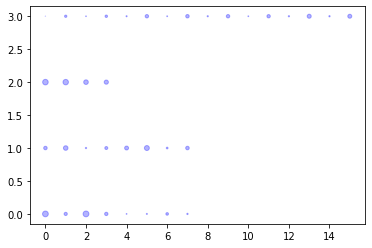

In [43]:
plot_speckle(prob_list)

TASK 2: 

In [44]:
def runMultiple(N,depth,SampleSize,runs=10):
    _result = []
    for _ in range(runs):
        qubits = [cirq.LineQubit(x) for x in range(N)]
        circuit = cirq.Circuit([])
        gates = ()
        for i in range(depth):
            idx_first = i % 2 

            circuit.append((gateR(theta=2*np.pi*random.random(),phi=2*np.pi*random.random()).on(qubits[j]) for j in range(N)))
            circuit.append((gateM(theta=2*np.pi*random.random()).on(qubits[j],qubits[j+1]) for j in range(idx_first,N-1)))
        circuit.append(cirq.X.on(qubits[random.randrange(0, N-1)]))
        circuit.append([cirq.measure(q,key=f'q{count}') for count,q in enumerate(qubits)])
        result = cirq.Simulator().run(circuit, repetitions=SampleSize)
        #_ = cirq.vis.plot_state_histogram(result, plt.subplot())
        prob_df=result.data.groupby(result.data.columns.tolist(),as_index=False).size()
        _result.append(list(prob_df['size']/SampleSize))
    return _result

In [45]:
N = 4
depth = 8
SampleSize = 1000
probs =runMultiple(4,8,SampleSize)

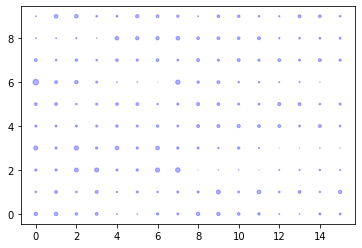

In [46]:
plot_speckle(probs)

TASK 3

In [ ]:
def plot_cummulative(prob):
    cumuSums = np.cumsum(x)
    plt.plot(prob,cumuSums,c='blue')
    plt.show()


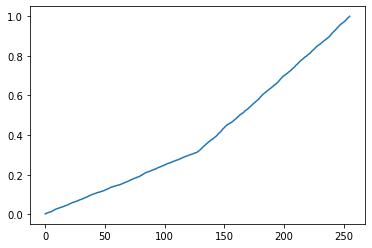

In [117]:
cumuSums = np.cumsum(depth512)
plt.plot(range(len(depth512)),cumuSums)

In [110]:
depth512

[0.257, 0.2522, 0.2434, 0.2474]

In [111]:
cumuSums

array([0.007 , 0.0072, 0.01  , 0.0146, 0.0162, 0.0196, 0.02  , 0.0224,
       0.0276, 0.0288, 0.0352, 0.0366, 0.0384, 0.0392, 0.043 , 0.0446,
       0.0458, 0.048 , 0.0486, 0.0568, 0.0574, 0.0592, 0.0632, 0.0638,
       0.064 , 0.0654, 0.068 , 0.0688, 0.0712, 0.073 , 0.099 , 0.102 ,
       0.1146, 0.1276, 0.1346, 0.1396, 0.1418, 0.149 , 0.1664, 0.169 ,
       0.181 , 0.186 , 0.1894, 0.192 , 0.1928, 0.1998, 0.2064, 0.2096,
       0.2126, 0.215 , 0.229 , 0.2296, 0.2358, 0.245 , 0.248 , 0.2486,
       0.2498, 0.2566, 0.2636, 0.2682, 0.2748, 0.2772, 0.2836, 0.2844,
       0.2872, 0.2898, 0.2916, 0.2928, 0.293 , 0.2942, 0.2986, 0.2988,
       0.3002, 0.3026, 0.303 , 0.3038, 0.3046, 0.305 , 0.306 , 0.3064,
       0.3076, 0.311 , 0.3118, 0.3134, 0.3142, 0.3146, 0.3156, 0.318 ,
       0.3186, 0.32  , 0.3204, 0.3536, 0.3556, 0.3726, 0.3846, 0.3916,
       0.398 , 0.4006, 0.4096, 0.4288, 0.4322, 0.4512, 0.4562, 0.4606,
       0.4648, 0.4658, 0.4746, 0.4786, 0.4832, 0.4866, 0.4906, 0.5088,
      